# Environment Tests

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

## Testing the CLI

In [16]:
from mergedownloader.cli import *
from mergedownloader.file_downloader import FileDownloader, ConnectionType

In [9]:
config = open_config()

In [11]:
config['DEFAULT']

<Section: DEFAULT>

In [13]:
print(create_epilog())

Actual configuration:
url=ftp.cptec.inpe.br
folder=/workspaces/reports_folder/downloads2
connection=HTTP
download=NO_UPDATE



In [15]:
config['DEFAULT']['connection']

'HTTP'

In [21]:
fd = FileDownloader(
    server=config["DEFAULT"]["url"],
    connection_type=ConnectionType.HTTP,
    # connection_type=config["DEFAULT"]["connection"],
    # download_mode=config["DEFAULT"]["download"]
)

AttributeError: 'FileDownloader' object has no attribute '_ftp'

In [22]:
ConnectionType('HTTP')

<ConnectionType.HTTP: 'HTTP'>

In [25]:
ConnectionType['HTTP']

<ConnectionType.HTTP: 'HTTP'>

In [26]:
ConnectionType.HTTP

<ConnectionType.HTTP: 'HTTP'>

In [27]:
ConnectionType.__members__

mappingproxy({'FTP': <ConnectionType.FTP: 'FTP'>,
              'HTTP': <ConnectionType.HTTP: 'HTTP'>})

## Testing Geopandas

In [2]:
from mergedownloader.file_downloader import FileDownloader, ConnectionType
from mergedownloader.downloader import Downloader
from mergedownloader.inpeparser import InpeParsers, InpeTypes, INPE_SERVER
import logging

fd = FileDownloader(server=INPE_SERVER, connection_type=ConnectionType.HTTP)

downloader = Downloader(file_downloader=fd, parsers=InpeParsers, local_folder='../../tmp')

Using wget through HTTP on: ftp.cptec.inpe.br


In [4]:
d = InpeTypes['DAILY_RAIN']

In [7]:
d.value

'DAILY_RAIN'

In [27]:
InpeTypes(1)

<InpeTypes.DAILY_RAIN: 1>

In [11]:
class obj:
    pass
args = obj()

args.dates = ('20230601', '20230620')
args.type = InpeTypes.DAILY_RAIN

cube = downloader.create_cube(
    start_date=args.dates[0],
    end_date=args.dates[1],
    datatype=args.type,
)

/usr/local/lib/python3.10/dist-packages/ecmwflibs/__init__.py:81: UserWarning: libglib-2.0.so.0: cannot open shared object file: No such file or directory
  warnings.warn(str(e))


In [3]:
shp = gpd.read_file('../../data/states/BR_UF_2022.shp')

In [14]:

geom = shp['geometry']

In [16]:
geom = geom.to_crs(cube.rio.crs)

In [12]:
cube.rio.crs

CRS.from_epsg(4326)

In [17]:
cube.rio.crs == geom.crs

True

In [21]:
shp.

TypeError: 'GeoSeries' object is not callable

In [19]:
cube.rio.crs

CRS.from_epsg(4326)

In [5]:
shp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

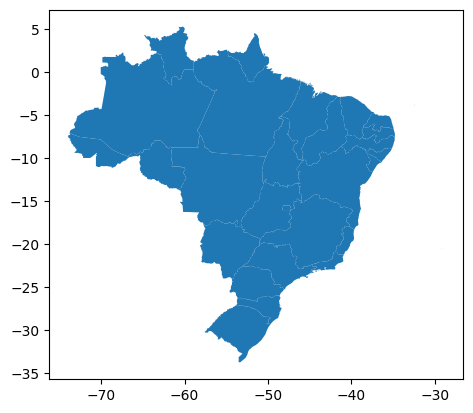

In [6]:
shp.plot()

In [7]:
shp.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."


In [15]:
amazonas = shp.iloc[1:2]


In [17]:
amazonas.to_file('../data/amazon.geojson')

In [7]:
cutted = cube.rio.clip(shp.geometry)

<Axes: title={'center': 'step = 0 days 00:00:00, surface = 0.0 [1], spat...'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

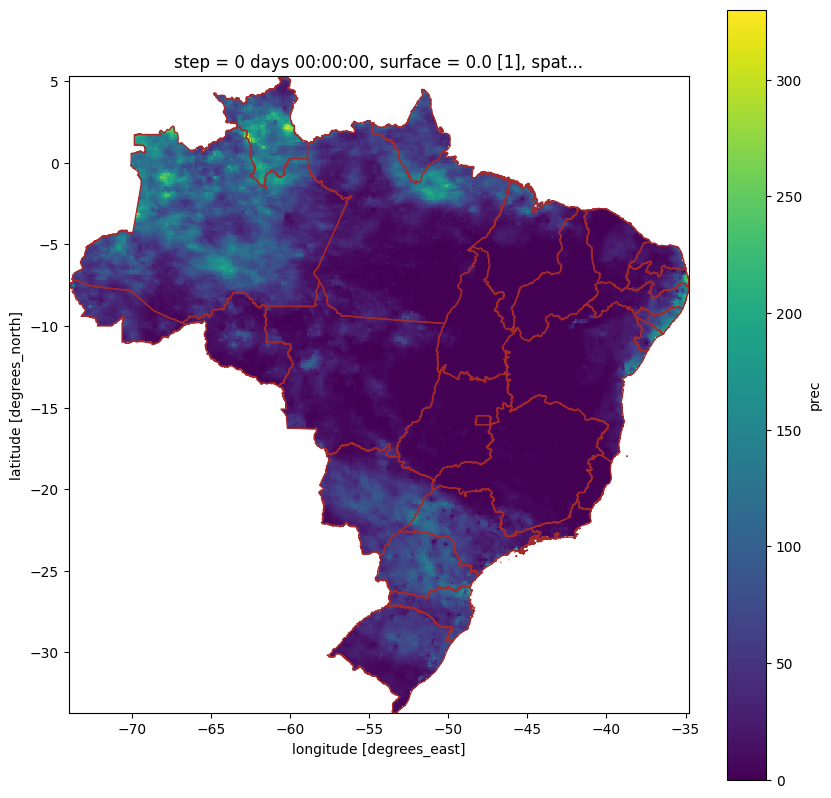

In [8]:
# create a thumbnail
fig, ax = plt.subplots(figsize=(10, 10))
cube_accum = cube.sum(dim="time")
cutted = cube_accum.rio.clip(shp.geometry)
cutted.plot(ax=ax, )
shp.plot(ax=ax, facecolor='none', edgecolor='brown')


In [9]:
series_pd = Downloader.get_time_series(
    cube=cube,
    shp=shp,
    reducer=xr.DataArray.mean
)

Coverting shp CRS to EPSG:4326


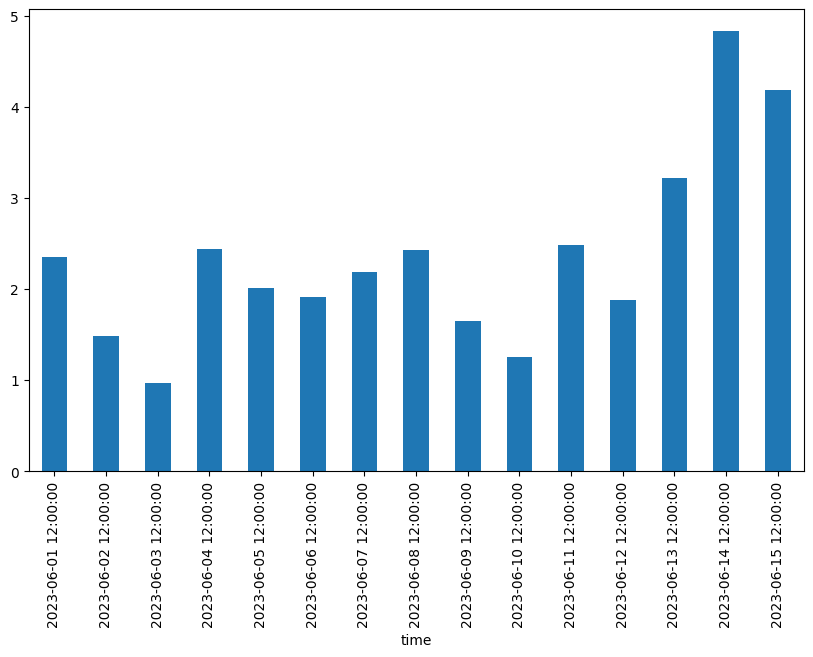

In [10]:
axes = series_pd.plot(kind='bar', figsize=(10, 6))

In [11]:
import matplotlib.dates as mdates

# Rotate x-axis labels using the axes object
labels = axes.get_xticklabels()
axes.set_xticklabels(labels, rotation=90)
# Format x-axis labels
date_format = mdates.DateFormatter('%Y-%m-%d')
axes.xaxis.set_major_formatter(date_format)

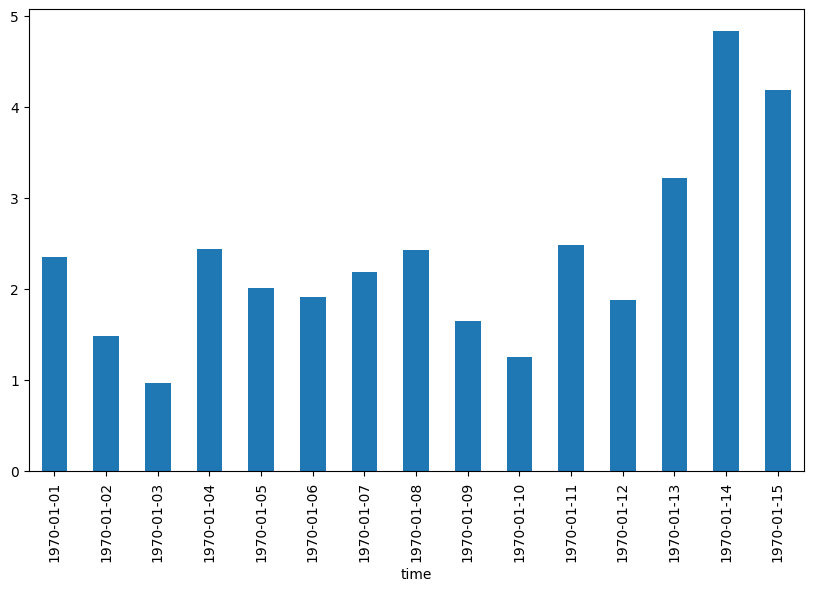

In [12]:
axes.figure

In [63]:
rs = shp.query("SIGLA_UF == 'RS'")
south = shp.query("SIGLA_UF in ['RS', 'SC', 'PR']")

In [73]:
from mergedownloader.utils import GISUtil

GISUtil.animate_cube(
    cube=cube,
    filename='../tmp/animation_south.gif',
    shp=south,
    max_quantile=0.9995,
    frametime=25
)

Appending: 2023-06-01T12:00:00.000000000
Appending: 2023-06-02T12:00:00.000000000
Appending: 2023-06-03T12:00:00.000000000
Appending: 2023-06-04T12:00:00.000000000
Appending: 2023-06-05T12:00:00.000000000
Appending: 2023-06-06T12:00:00.000000000
Appending: 2023-06-07T12:00:00.000000000
Appending: 2023-06-08T12:00:00.000000000
Appending: 2023-06-09T12:00:00.000000000
Appending: 2023-06-10T12:00:00.000000000
Appending: 2023-06-11T12:00:00.000000000
Appending: 2023-06-12T12:00:00.000000000
Appending: 2023-06-13T12:00:00.000000000
Appending: 2023-06-14T12:00:00.000000000
Appending: 2023-06-15T12:00:00.000000000
Appending: 2023-06-16T12:00:00.000000000
Appending: 2023-06-17T12:00:00.000000000
Appending: 2023-06-18T12:00:00.000000000
Appending: 2023-06-19T12:00:00.000000000
Appending: 2023-06-20T12:00:00.000000000


<Figure size 640x480 with 0 Axes>

In [ ]:
# ARRUMAR O TITULO DO GRÁFICO

In [79]:
countries = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson')


In [86]:
countries['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'South America', 'Antarctica',
       'Seven seas (open ocean)', 'Oceania', 'North America'],
      dtype=object)

In [109]:
SA = countries.query("continent in ['South America']")

In [113]:
SA.to_file('../data/south_america.geojson')

<Axes: >

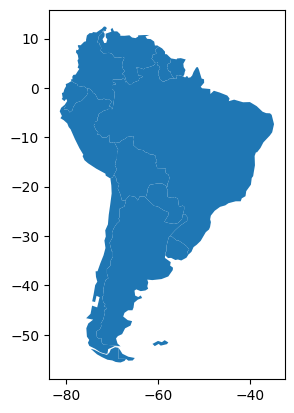

In [112]:
gpd.read_file('../data/south_america.geojson').plot()

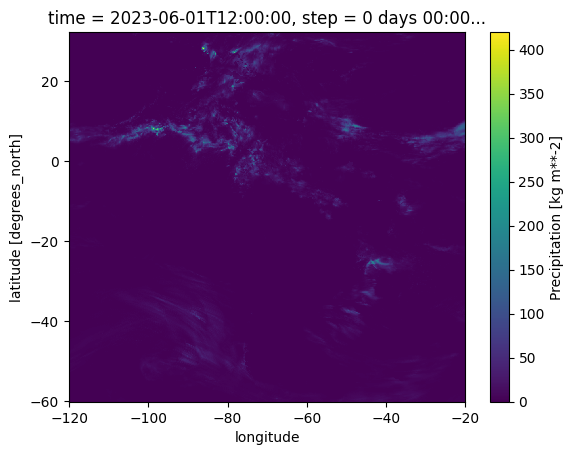

In [85]:
cube[0].plot()

In [74]:
cutcube = GISUtil.cut_cube_by_geoms(cube, rs.geometry)

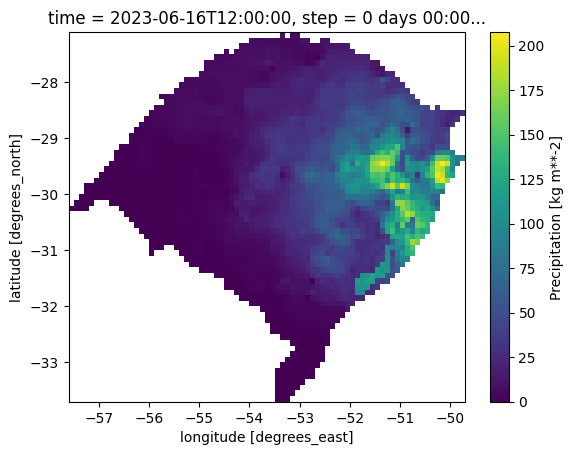

In [77]:
cutcube[15].plot()

In [116]:
INPETypes.DAILY_AVERAGE.value

{'id': <enum.auto at 0xffff55a29fc0>, 'var': 'pmed'}

In [93]:

from PIL import Image

files = [Path('../tmp/')/f'fig{i}.png' for i in range(15)]

images = [Image.open(file) for file in files]

images[0].save('../tmp/output.gif', save_all=True, append_images=images[1:], duration=100, loop=0)



(<Figure size 640x480 with 1 Axes>, <Axes: >)

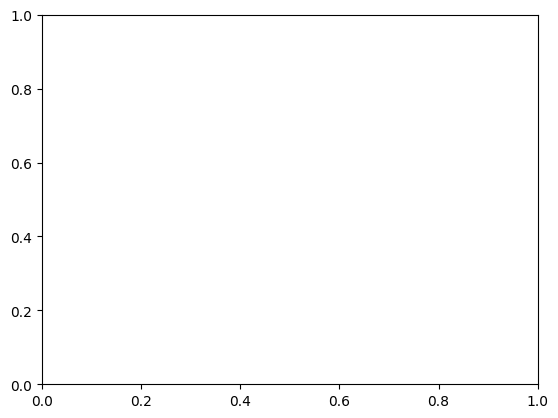

In [97]:
plt.subplots(num=1)

## Testing Rasterio

In [15]:
import rasterio as rio

In [16]:

dataset = rio.open(onedrive/'Transfer/Images/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829.SAFE/GRANULE/L2A_T22KEV_A028993_20220924T133741/IMG_DATA/R10m/T22KEV_20220924T133149_B02_10m.jp2')

In [17]:
array = dataset.read().shape

## Testing Contextily

In [21]:
import contextily as cx

In [28]:
parana = gpd.read_file(shapes/'bacia_Parana.shp').to_crs(dataset.crs)

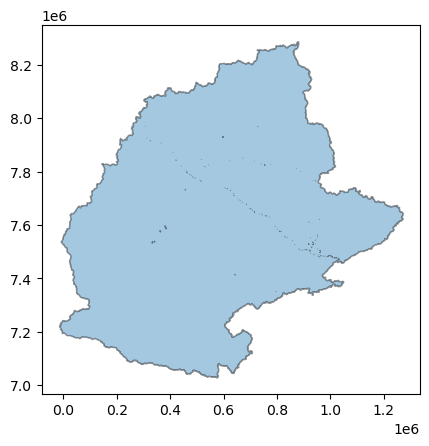

In [36]:
ax = parana.plot(alpha=0.4, edgecolor='black')

In [37]:
cx.add_basemap(ax=ax, source=dataset.name, crs=dataset.crs, reset_extent=True, vmin=0, vmax=2000)

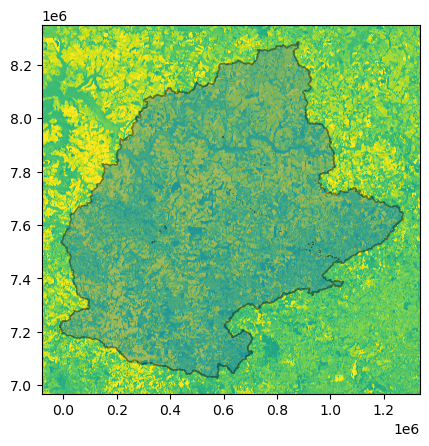

In [38]:
ax.figure